# **Name: Muhammad Anus**
# **Project:Car_sales_prediction**

In [ ]:
from IPython.display import Image
Image(url='https://media.istockphoto.com/id/1473399467/photo/salesman-showing-cars-to-a-couple-at-the-dealership.jpg?s=1024x1024&w=is&k=20&c=8D-Z1vVqoMvX4r7UPJILhB_BQZGYOUZ5l_KcF-BkpSk=', width=850)

# **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# **Load Datasets**

In [ ]:
df = pd.read_csv("/content/car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# **Pre_Processing Data**

In [ ]:
df_drop = df.drop(['Car_Name' , 'Selling_type' , 'Owner'] , axis=1)
df_drop

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Manual
1,2013,4.75,9.54,43000,Diesel,Manual
2,2017,7.25,9.85,6900,Petrol,Manual
3,2011,2.85,4.15,5200,Petrol,Manual
4,2014,4.60,6.87,42450,Diesel,Manual
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Manual
297,2015,4.00,5.90,60000,Petrol,Manual
298,2009,3.35,11.00,87934,Petrol,Manual
299,2017,11.50,12.50,9000,Diesel,Manual


In [ ]:
print(df_drop.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [ ]:
print(df.shape)
print(df_drop.shape )

(301, 9)
(301, 6)


In [ ]:
df_drop.loc[df['Fuel_Type'] == 'Diesel', 'Fuel_Type',] = 0
df_drop.loc[df['Fuel_Type'] == 'Petrol', 'Fuel_Type',] = 1
df_drop.loc[df['Fuel_Type'] == 'CNG', 'Fuel_Type',] = 2


df_drop.loc[df['Transmission'] == 'Automatic', 'Transmission',] = 0
df_drop.loc[df['Transmission'] == 'Manual', 'Transmission',] = 1

df_drop

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Transmission
0,2014,3.35,5.59,27000,1,1
1,2013,4.75,9.54,43000,0,1
2,2017,7.25,9.85,6900,1,1
3,2011,2.85,4.15,5200,1,1
4,2014,4.60,6.87,42450,0,1
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1
297,2015,4.00,5.90,60000,1,1
298,2009,3.35,11.00,87934,1,1
299,2017,11.50,12.50,9000,0,1


In [ ]:
x = df_drop.drop(['Selling_Price'] , axis =1)
y = df_drop['Selling_Price']

In [ ]:
print(f"x is \n{x}")
print(f"y is \n {y}")

x is 
     Year  Present_Price  Driven_kms Fuel_Type Transmission
0    2014           5.59       27000         1            1
1    2013           9.54       43000         0            1
2    2017           9.85        6900         1            1
3    2011           4.15        5200         1            1
4    2014           6.87       42450         0            1
..    ...            ...         ...       ...          ...
296  2016          11.60       33988         0            1
297  2015           5.90       60000         1            1
298  2009          11.00       87934         1            1
299  2017          12.50        9000         0            1
300  2016           5.90        5464         1            1

[301 rows x 5 columns]
y is 
 0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# **Model creation**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x , y , train_size=0.2 , random_state=2)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60, 5)
(60,)
(241, 5)
(241,)


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train , Y_train)

LinearRegression()

# **Model Evaluation**

In [ ]:
evaluate = model.predict(X_train)
evaluate

array([37.60390998,  6.30266639,  5.37392922,  0.87065675,  7.71624851,
        6.88497992,  7.7463377 ,  2.40108105,  6.09524957,  9.2905148 ,
        3.77704142,  2.72638771,  6.68169977,  6.88264701, 17.31261965,
        9.50014487,  6.81976386,  0.99739169,  1.7037798 ,  2.30866708,
        5.15048764,  5.44669418,  1.50692306,  8.75855319,  6.37499548,
        6.78655319,  2.9649324 , 17.11852116,  4.08117163, 15.67169181,
       10.59841992,  1.35202711,  0.17778698,  9.99978334, -0.51567032,
        2.82058852,  2.03053692,  3.63255824,  7.6185176 ,  3.5374522 ,
       18.80727417,  7.29924741,  3.28557254,  1.62939278,  1.3002262 ,
        1.08489384,  0.75946417,  4.23681432,  7.0460774 , -1.45951306,
        2.15702866,  9.28865681,  7.12213559,  0.45552389,  5.04891078,
        4.14138819,  5.23244421,  7.66839386,  8.94732939,  0.86049785])

# **Testing**

In [ ]:
# from sklearn.metrics import accuracy_score
accuracy = metrics.r2_score(Y_train, evaluate)
print("Evaluation Accuracy:", accuracy)


Evaluation Accuracy: 0.9301056790343818


In [ ]:
test = model.predict(X_test)

In [ ]:
test_accuracy = metrics.r2_score(Y_test, test)

In [ ]:
test_accuracy

0.8157097349349156

# **Test graph**

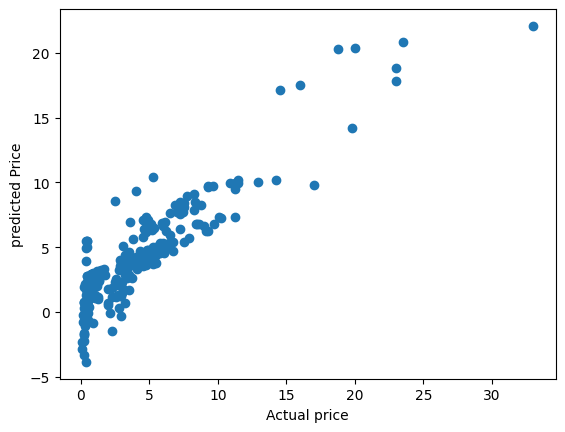

In [ ]:
plt.scatter(Y_test , test)
plt.xlabel("Actual price")
plt.ylabel("predicted Price")
plt.show()